In [25]:
!pip install pmdarima

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Walmart = pd.read_csv("https://raw.githubusercontent.com/slmsshk/DataSet/main/footfalls.csv")
Walmart = pd.read_csv("footfalls.csv")
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


In [14]:
Walmart["Date"] = pd.to_datetime(Walmart.Month,format="%b-%y")
#look for c standard format codes
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01


In [16]:
Walmart["month"] = Walmart.Date.dt.strftime("%b") # month extraction
Walmart["year"] = Walmart.Date.dt.strftime("%Y") # year extraction
Walmart

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Date,month,year
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0,1991-01-01,Jan,1991
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0,1991-02-01,Feb,1991
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0,1991-03-01,Mar,1991
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0,1991-04-01,Apr,1991
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0,1991-05-01,May,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0,2003-11-01,Nov,2003
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1,2003-12-01,Dec,2003
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0,2004-01-01,Jan,2004
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0,2004-02-01,Feb,2004


### Build SARIMA Model

In [18]:
ts = pd.DataFrame(Walmart, columns = ["Date", "Footfalls"])
ts

,Date,Footfalls
0,1991-01-01,1709
1,1991-02-01,1621
2,1991-03-01,1973
3,1991-04-01,1812
4,1991-05-01,1975
...,...,...
154,2003-11-01,2076
155,2003-12-01,2141
156,2004-01-01,1832
157,2004-02-01,1838


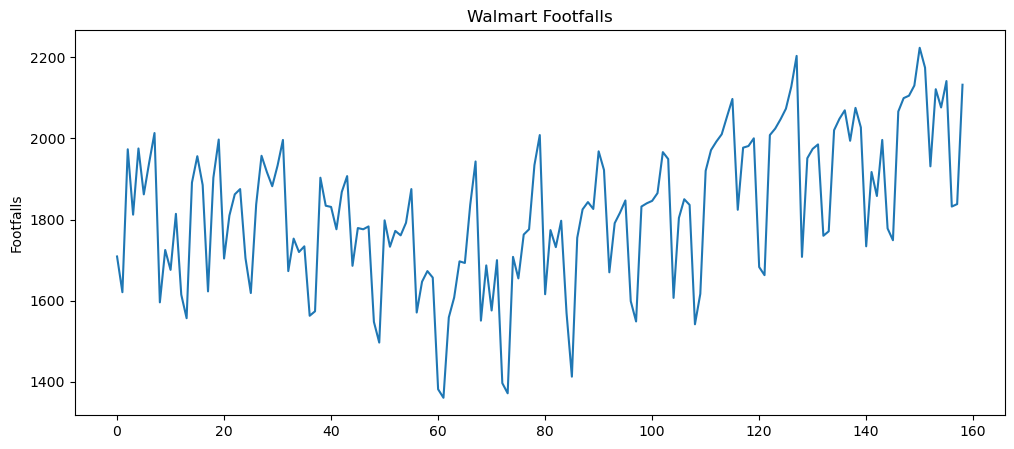

In [20]:
# Line plot
import matplotlib.pyplot as plt

ts["Footfalls"].plot(figsize=(12,5), \
                    title="Walmart Footfalls", ylabel="Footfalls")
plt.show()


### Augmented Dickey-Fuller (ADF) test for checking stationarity of series
#### h0 : The series is non-stationary
#### ha : The series is stationary

In [22]:
# Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

result = adfuller(ts["Footfalls"])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
if (result[1] < 0.05):
    print("Reject Null Hypothesis: Series is stationary")
else:
    print("Series is Non-stationary")

ADF Statistic: -0.23499112877867046
p-value: 0.9342202042969283
Series is Non-stationary


ADF Statistic after 1st differencing: -3.326842715430069
p-value: 0.013720419909834152


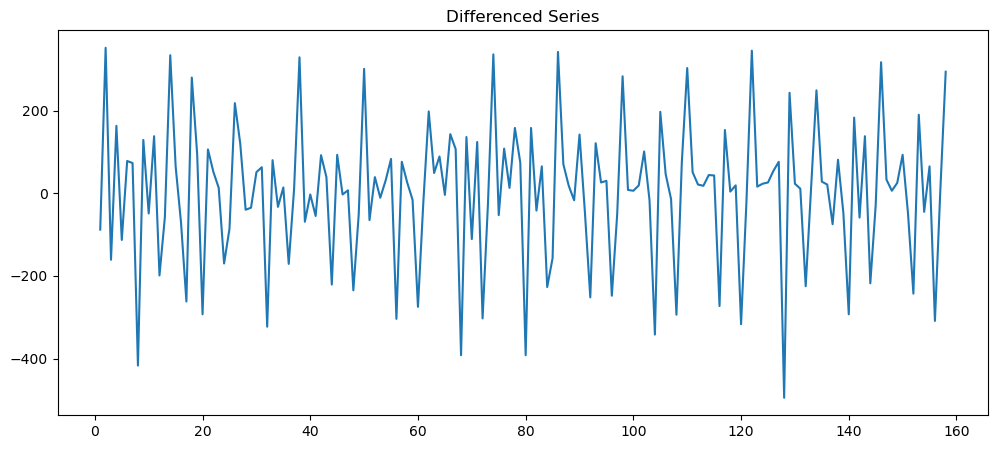

In [26]:
# Perform first order differencing
ts_diff = ts["Footfalls"].diff().dropna()
result_diff = adfuller(ts_diff)

print("ADF Statistic after 1st differencing:",\
                                    result_diff[0])
print("p-value:", result_diff[1])
ts_diff.plot(figsize=(12,5), title="Differenced Series")
plt.show()

### ACF and PACF Plots

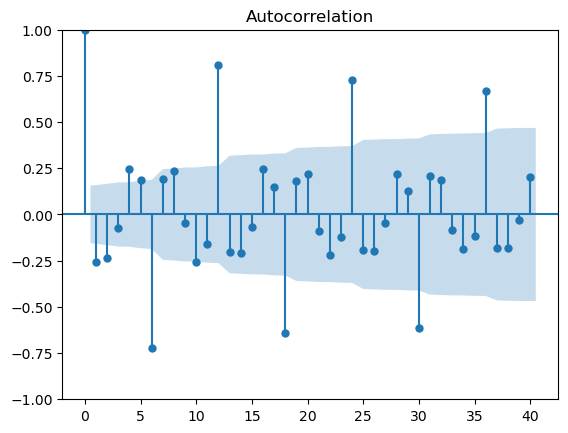

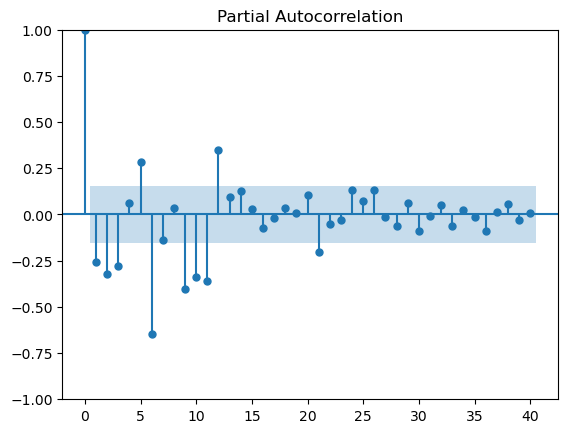

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_diff, lags=40)
plot_pacf(ts_diff, lags=40)
plt.show()


### Build Final Model

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(ts["Footfalls"], order=(1,1,1), \
                              seasonal_order=(1,0,1,12))
results = model.fit()
print(results.summary())

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                          Footfalls   No. Observations:                  159
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -894.082
Date:                            Sat, 20 Sep 2025   AIC                           1798.165
Time:                                    11:23:29   BIC                           1813.478
Sample:                                         0   HQIC                          1804.383
                                            - 159                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8337      0.065     12.781      0.000       0.706       0.962
ma.L1         -0.9941      0.025   

C:\Users\shiva\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Forecasting in to future

In [29]:
n_forecast = 12
forecast = results.get_forecast(steps=n_forecast)
forecast_ci = forecast.conf_int()

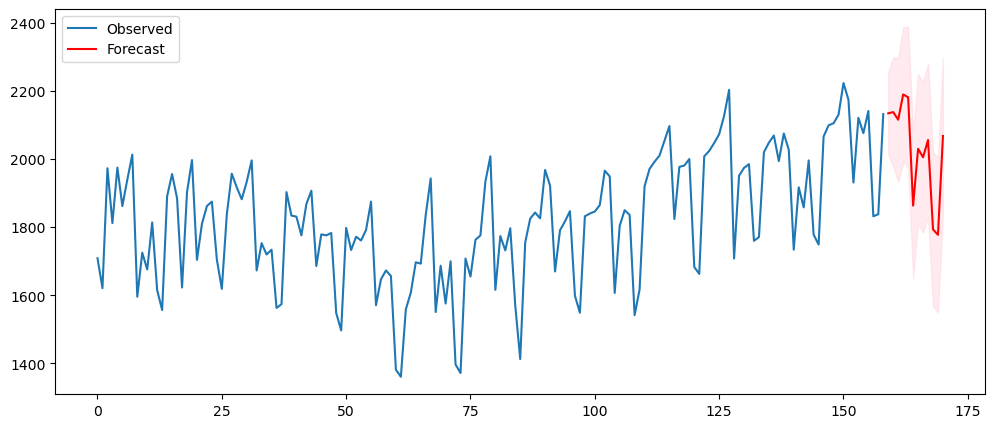

In [35]:
# Plot the forecasted values
plt.figure(figsize=(12,5))
plt.plot(ts.index, ts["Footfalls"], label="Observed")
plt.plot(forecast.predicted_mean.index,forecast.predicted_mean, \
                label="Forecast", color="red")
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], \
                 color="pink", alpha=0.3)
plt.legend()
plt.show()


In [27]:
import pmdarima as pm
# auto_arima automatically finds d and seasonal parameters
stepwise_model = pm.auto_arima(ts["Footfalls"],
                               start_p=1, start_q=1,
                               max_p=3, max_q=3,
                               d=None,           # let auto_arima decide differencing
                               seasonal=True,    # seasonal SARIMA
                               m=12,             # monthly seasonality
                               start_P=0, start_Q=0,
                               max_P=3, max_Q=3,
                               D=None,           # let it decide seasonal differencing
                               trace=True,       # show the trials
                               error_action='ignore',  
                               suppress_warnings=True,
                               stepwise=True)    # faster search

print(stepwise_model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=2026.947, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2072.224, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1948.860, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2070.264, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2042.357, Time=0.09 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1786.310, Time=0.90 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1827.620, Time=0.31 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=1788.625, Time=2.03 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1790.174, Time=2.27 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1906.436, Time=1.13 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=1803.783, Time=1.08 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=2.30 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1809.141, Time=0.53 sec
 ARIMA(1,1,1)(1,0,1)[12] inte